# 13wk-2: 클래스 (3)

최규빈  
2024-05-31

<a href="https://colab.research.google.com/github/guebin/PP2024/blob/main/posts/13wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yhYjyDRkhCJb6R3GNIL-Ex&si=VMJzZ7DkVAhpY2pa>

# 2. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

# 3. 오브젝트

> “파이썬의 모든 것은 오브젝트이다. 값도, 함수도, 인스턴스도, 클래스도
> 오브젝트이다.” \<– 살짝 과장이지만 일단 명언처럼 외우세여

## A. 오브젝트

> 오브젝트 특징: `id(오브젝트)` 가 동작함

`-` 예시1: 정수

In [11]:
a = 1 
id(a)

`-` 예시2: 함수

In [12]:
f = lambda x: x
id(f)

`-` 예시3: 클래스와 인스턴스

In [20]:
class RPS:
    pass 

In [500]:
a = RPS()
id(a)

In [501]:
id(RPS)

`-` 예시4: 파이썬 제공 기본클래스

In [26]:
id(list)

In [27]:
id(str)

In [28]:
id(dict)

`-` 예시5: 파이썬 기본 제공기능

In [34]:
id(range)

In [35]:
id(len)

In [36]:
id(id)

`-` 모듈

In [37]:
id(np)

In [38]:
id(pd)

## B. 오브젝트가 아님

`-` 예시1: 구문

In [39]:
id(lambda)

In [40]:
id(def)

`-` 예시2: 제어구조

In [41]:
id(for)

In [42]:
id(if)

In [43]:
id(while)

# 4. `__call__` $(\star\star\star)$

## A. 함수도 인스턴스다

`-` 다시 함수를 공부해봅시다.

In [44]:
def f(x):
    return x+1

In [45]:
f(3)

`-` 함수의 사용방법?

-   입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음.
-   출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴.

In [47]:
f(3)

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를
출력한다.

`-` 함수의 자료형?

In [56]:
?f

-   type이 function이다.
-   f는 function class의 instance이다.
-   결국 f 역시 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -\> 함수의 입력으로 함수를 쓸 수도
있고 함수의 출력으로 함수가 나올 수도 있다.

## B. 함수사용 고급

`# 예제1` – 숫자입력, 함수출력

In [63]:
def f(a):
    def g(x):
        return (x-a)**2
    return g

In [61]:
g=f(10) # g(x)=(x-10)**2

In [62]:
g(2) # (2-10)**2 = 64

-   해석: $f(a)$는 $a$를 입력으로 받고 $g(x)=(x-a)^2$라는 함수를
    리턴해주는 함수

> 아니 무슨 함수를 “값처럼” 취급해서 리턴하네??

**lambda를 이용한 표현1**

In [78]:
def f(a):
    g = lambda x: (x-a)**2 ### lambda x: (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 g 로 저장됨
    return g

In [65]:
g = f(10) # g(x)=(x-10)**2

In [66]:
g(3) # (3-10)**2 = 49

**lambda를 이용한 표현2**

In [68]:
def f(a):
    return lambda x: (x-a)**2

In [69]:
g=f(10) # g(x)=(x-10)**2

In [70]:
g(3) # (3-10)**2 = 49

`#`

`# 예제2` – 함수와 숫자를 입력으로, 숫자출력으로

In [521]:
def slope(f,x): # 함수를 입력을 받는 함수를 정의
    h=0.000000000001
    return (f(x+h)-f(x))/h

In [91]:
slope(f,4) # f'(4) = 2*4 = 8

`#`

`# 예제3` – 함수입력, 함수출력

In [141]:
def derivate(f):
    h = 0.000000000001
    ff = lambda x: (f(x+h)-f(x))/h
    return ff

In [142]:
f = lambda x: x**2 # f(x) = x^2
ff = derivate(f) # ff(x) = 2x

In [143]:
ff(7) # ff는 f의 도함수 그자체

**원래함수 시각화**

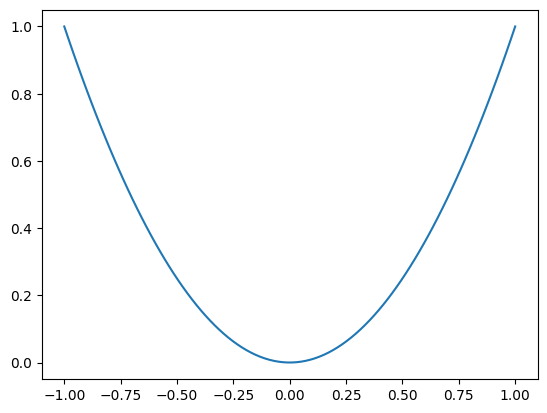

In [144]:
x = np.linspace(-1,1,100)
f = lambda x: x**2
plt.plot(x,f(x))

**도함수 시각화**

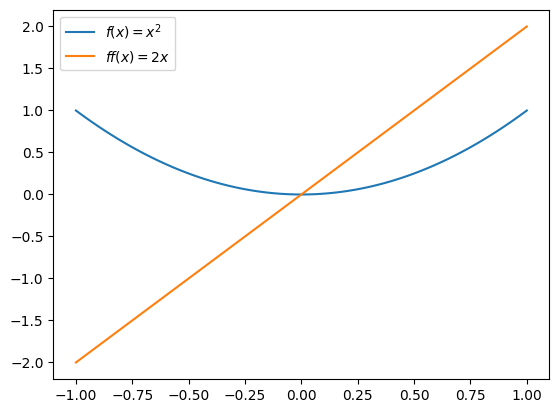

In [145]:
x = np.linspace(-1,1,100)
f = lambda x: x**2
ff = derivate(f)
plt.plot(x,f(x),label=r'$f(x)=x^2$')
plt.plot(x,ff(x),label=r'$ff(x)=2x$')
plt.legend()

`#`

`# 예제4` – 함수들의 리스트

In [159]:
f_list = [lambda x: x**2, lambda x: np.cos(5*x)]

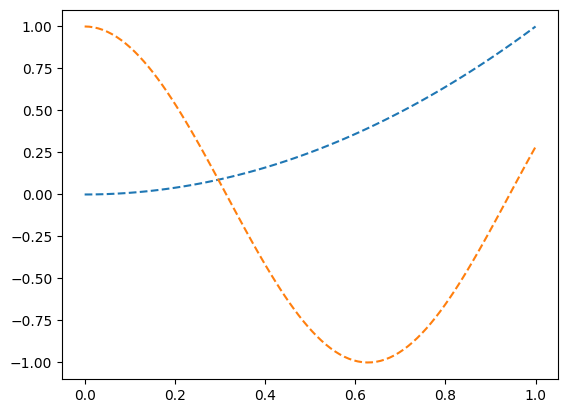

In [163]:
x = np.linspace(0,1,100)
for f in f_list: 
    plt.plot(x,f(x),'--')

In [169]:
ff_list = list(map(derivate,f_list))

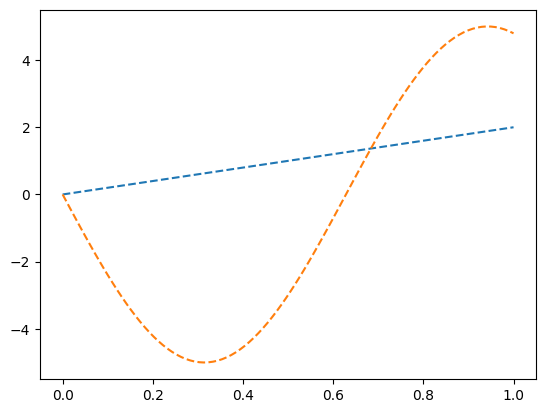

In [170]:
x = np.linspace(0,1,100)
for ff in ff_list: 
    plt.plot(x,ff(x),'--')

`#`

## C. 정리

`-` 지금까지 개념

-   함수: 변수를 입력으로 받아서 변수를 출력하는 개념
-   변수: 어떠한 값을 저장하는 용도로 쓰거나 함수의 입력 혹은 출력으로
    사용함

`-` R과 구별되는 파이썬의 독특한 테크닉 (부제: 파이썬에서 함수를 잘
쓰려면?)

-   변수든 함수이든 둘다 인스턴스임. (즉 어떠한 클래스에서 찍힌 똑같은
    오브젝트라는 의미)
-   변수를 함수처럼: 메소드 `lst.append(1)`은 마치 `append(lst,1)`와
    같은 함수로 쓸 수 있음
-   함수를 변수처럼($\star$): 함수자체를 함수의 입력으로 혹은 출력으로
    쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도
    있다.

## D. callable object

`-` 함수 오브젝트의 비밀?

In [198]:
f = lambda x: x+1

In [203]:
f(100) # 이게 왜 가능하지? 

In [205]:
f.__call__(100) # f(100)

In [214]:
set(dir(f)) & {'__call__'}

-   함수 오브젝트에는 숨겨진 기능 `__call__`이 있다.

In [188]:
f.__call__(3) # f(3)

In [189]:
f.__call__(4) # f(4)

-   여기에 우리가 정의한 내용이 있다.

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 `__call__`이 없는 것일 뿐이다.

In [216]:
class Guebin:
    def __init__(self):
        self.name = 'guebin'

In [217]:
a = Guebin()

In [221]:
a()

-   callable이 아니라고 한다.

In [224]:
class Guebin2:
    def __init__(self):
        self.name = 'guebin'    
    def __call__(self):
        print(self.name)

In [225]:
b = Guebin2()

In [226]:
b()

guebin

-   b는 callable object! 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
-   `Guebin`는 callable object를 만들지 못하지만 `Guebin2`는 callable
    object를 만든다.

> 파이썬의 비밀: `f()`와 같이 쓸 수 있는 오브젝트는 단지 `__call__` 이
> 정의되어있는 오브젝트일 뿐이다.

`-` callable 을 체크하는 방법

In [227]:
set(dir(b)) & {'__call__'}

In [229]:
isinstance(a,collections.abc.Callable)

In [230]:
isinstance(b,collections.abc.Callable)

# 5. `__iter__` ($\star\star\star\star\star$)

## A. for문의 복습

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

`# 예시1` – `[1,2,3,4]`

In [317]:
for i in [1,2,3,4]:
    print(i,type(i))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>

`#`

`# 예시2` – `(1,2,3,4)`

In [316]:
for i in (1,2,3,4):
    print(i,type(i))

1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>

`#`

`# 예시3` – `'1234'`

In [315]:
for i in '1234':
    print(i,type(i))

1 <class 'str'>
2 <class 'str'>
3 <class 'str'>
4 <class 'str'>

`#`

`# 예시4` – `5`

In [322]:
for i in 5:
    print(i,type(i))

-   5가 출력되는게 합리적이지 않나?

`-` 의문1:

``` python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까?

`#`

`# 예시5` – `[[1,2,3,4],[3,4,5,6]]`,
`pd.DataFrame([[1,2,3,4],[3,4,5,6]])`

In [324]:
lst = [[1,2,3,4],[3,4,5,6]]
lst

In [329]:
for l in lst:
    print(l,type(l))

[1, 2, 3, 4] <class 'list'>
[3, 4, 5, 6] <class 'list'>

In [330]:
for l in np.array(lst):
    print(l,type(l))

[1 2 3 4] <class 'numpy.ndarray'>
[3 4 5 6] <class 'numpy.ndarray'>

In [334]:
for l in pd.DataFrame(lst):
    print(l, type(l))

0 <class 'int'>
1 <class 'int'>
2 <class 'int'>
3 <class 'int'>

-   뭐야? 아는 문법이긴 한데 이렇게 보니까 이상하네

`-` 데이터프레임인 경우는 colname이 반복

In [338]:
dct = {'x':[1,2,3],'y':[2,3,4]}
df = pd.DataFrame(dct)
df

In [339]:
for colname in df:
    print(colname)

x
y

In [340]:
for key in dct:
    print(key)

x
y

`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

`#`

## B. for문의 동작원리

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여
`__iter__`가 있는 object이다.

``` python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 예제1~4 확인

In [351]:
lst = [1,2,3]
#set(dir(lst)) & {'__iter__'}
isinstance(lst,collections.abc.Iterable)

In [352]:
tpl = 1,2,3
#set(dir(tpl)) & {'__iter__'}
isinstance(tpl,collections.abc.Iterable)

In [353]:
string = '123'
#set(dir(string)) & {'__iter__'}
isinstance(string,collections.abc.Iterable)

In [356]:
a = 5
#set(dir(a)) & {'__iter__'}
isinstance(a,collections.abc.Iterable)

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [411]:
lst = [1,22,-33]

In [412]:
list_iterator = lst.__iter__()
# list_iterator = iter(lst)

`-` iterator가 되면 무엇이 좋은가? -\> 숨겨진 기능 `__next__`가 열린다.

In [413]:
set(dir(list_iterator)) & {'__next__'}

`-` 그래서 `__next__`의 기능은? -\> 원소를 차례대로 꺼내준다 + 더 이상
꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [414]:
next(list_iterator)
# list_iterator.__next__() # 같은코드

In [415]:
next(list_iterator)
# list_iterator.__next__() # 같은코드

In [416]:
next(list_iterator)
# list_iterator.__next__() # 같은코드

In [417]:
next(list_iterator)
# list_iterator.__next__() # 같은코드

`-` 참고로 아래들도 같은코드임

In [428]:
a = [100,200]
a.__repr__(), repr(a)

In [429]:
a = [100,200]
a.__str__(), str(a)

In [430]:
a = [100,200]
a.__len__(), len(a)

In [431]:
a = [100,200]
a.__iter__(), iter(a)

In [432]:
a = iter([100,200])
a.__next__(), next(a)

`-` for문의 동작원리

``` python
for i in iterable:
    ...
```

1.  `__iter__` 실행: `.__iter__()` 혹은 `iter()`을 이용하여 iterable을
    iterator로 만든다.

2.  `__next__` 실행: 1에서 만들어진 iterator에서 `.__next__()` 함수를
    호출한다. `.__next__()`함수를 호출했을때 StopIteration Error 이
    나오면 반복을 멈추고, 그렇지 않으면 for문 블락안의 내용 (들여쓰기 된
    내용) 을 실행한다.

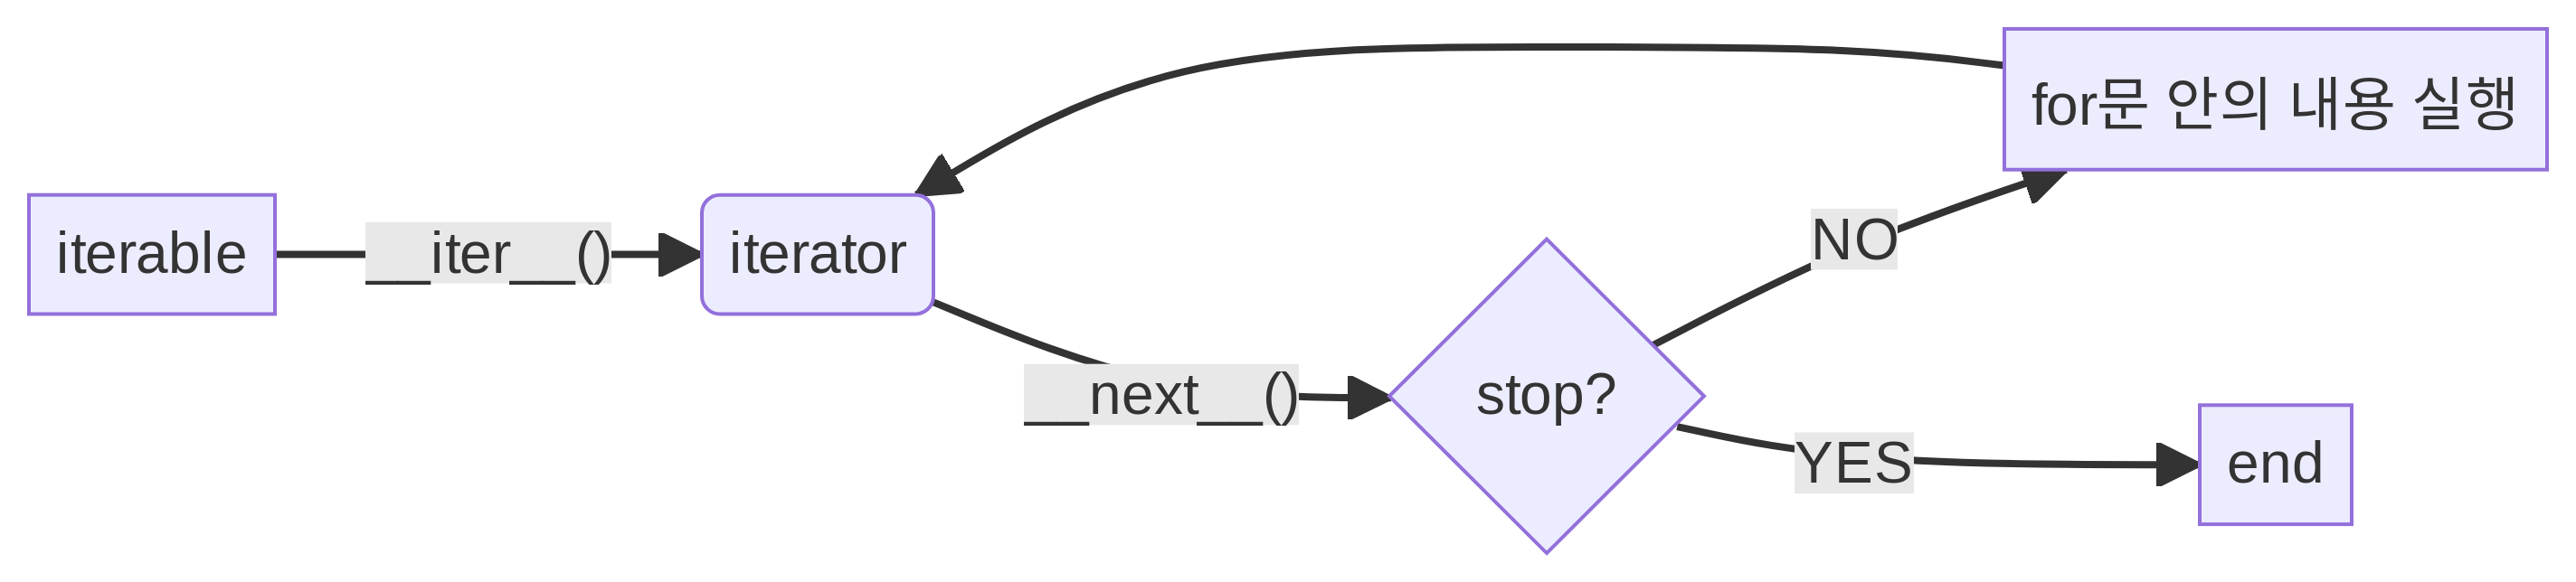

In [441]:
# lst = [1,2,-3]
# for l in lst:
#     print(l+1)
lst = [1,2,-3]
list_iterator = iter(lst)
l = next(list_iterator)
print(l+1)
l = next(list_iterator)
print(l+1)
l = next(list_iterator)
print(l+1)
l = next(list_iterator) # StopIteration Error발생 -- for문 멈춤

2
3
-2

`-` 아래의 구조도 잘 돌아갈까?

``` python
for i in iterator:
    print(i)
```

In [444]:
lst = [1,2,-3]
for l in iter(lst): # 당연히 되겠지?
    print(l+1)

2
3
-2

> 얼핏드는 생각: iterator일 경우와 iterable일 경우로 나누어서 로직을
> 짜면 좋을 것같다. 즉 iterator인 경우 `__iter__`의 실행과정없이 바로
> `__next__`를 실행하면 될 것 같다.

> 더 좋은 생각: iterator일 경우도 `__iter__`를 따로 정의해서 자기자신을
> return하도록 설정하는 트릭을 쓴다면 위의 다이어그램을 별도로 수정할
> 필요가 없다.

`-` 요약

-   iterable object는 숨겨진 기능으로 `__iter__`를 가진다. (`__next__`는
    없음)
-   iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서
    정의상 iterator는 그 자체로 iterable object가 된다!
-   iterator의 `__iter__`는 자기자신을 리턴한다.

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를
만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [258]:
df_itertor = iter(df)

In [259]:
next(df_itertor)

In [260]:
next(df_itertor)

In [261]:
next(df_itertor)

## C. 사용자정의 이터레이터

`-` 내가 이터레이터를 만들어보자.

`-` “가위”를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.

In [8]:
class RPS_ITERATOR: # 가위를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self):
        self.action_space = ["가위","바위","보"]
        self.action = None 
    def __iter__(self):
        return self
    def __next__(self): 
        self.action = np.random.choice(self.action_space)
        if self.action == "가위":
            print("가위를 뽑았습니다. for문을 탈출합니다")
            raise(StopIteration)
        else: 
            return self.action 

In [9]:
player = RPS_ITERATOR()

In [17]:
for action in player:
    print(action)

보
바위
보
바위
보
보
가위를 뽑았습니다. for문을 탈출합니다

## D. `range()`

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [20]:
for i in range(5):
    print(i)

0
1
2
3
4

-   range(5)가 도데체 무엇이길래?

`-` `range`는 클래스이고, `range(5)`는 `range` 클래스에서 찍힌 iterable
한 인스턴스이다.

In [96]:
range_ins = range(5)
print(isinstance(range_ins,collections.abc.Iterable))
print(isinstance(range_ins,collections.abc.Iterator))

True
False

`-` `range_ins = range(5)` 언제든지 iterator로 바꿀 수 있다.
(이터러블하니까..)

In [97]:
range_iterator = iter(range_ins)
print(isinstance(range_iterator,collections.abc.Iterable))
print(isinstance(range_iterator,collections.abc.Iterator))

True
True

`-` for문에서 range(5)가 행동하는 방법?

In [98]:
range_iterator.__next__()

In [99]:
range_iterator.__next__()

In [100]:
range_iterator.__next__()

In [101]:
range_iterator.__next__()

In [102]:
range_iterator.__next__()

In [103]:
range_iterator.__next__()

> 파이썬의 작은 비밀: `range`은 `iterable` 오브젝트를 찍어내는
> 클래스였음

## E. `zip`

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [56]:
for i,j in zip([1,2,3],'abc'):
    print(i,j)

1 a
2 b
3 c

-   `zip([1,2,3],'abc')`은 뭐지?

`-` `zip`은 클래스이고, `zip([1,2,3],'abc')`는 `zip` 클래스에서 찍힌
iterator 이다.

In [104]:
zip_instance = zip([1,2,3],'abc')
print(isinstance(zip_instance,collections.abc.Iterable))
print(isinstance(zip_instance,collections.abc.Iterator))

True
True

In [105]:
next(zip_instance)

In [106]:
next(zip_instance)

In [107]:
next(zip_instance)

In [108]:
next(zip_instance)

> 파이썬의 작은 비밀: `zip`은 `iterator`를 찍어내는 클래스였음

## F. `enumerate`

`-` zip의 짝궁으로 enumerate가 있었음

In [66]:
for i,s in enumerate('abc'):
    print(i,s)

0 a
1 b
2 c

`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.
$\to$ 확인해보니 이터레이터!

In [110]:
enumerate_ins = enumerate('abc')
print(isinstance(enumerate_ins,collections.abc.Iterable))
print(isinstance(enumerate_ins,collections.abc.Iterator))

True
True

In [111]:
next(enumerate_ins)

In [112]:
next(enumerate_ins)

In [113]:
next(enumerate_ins)

In [114]:
next(enumerate_ins)

> 파이썬의 작은 비밀: `enumerate` 역시 `iterator`를 찍어내는 클래스다.

> 파이썬의 비밀: iterator나 iterable object만 for문과 함께 사용할 수
> 있다. (단, 예외적으로 `__getitem__` 이 정의된 경우에는 for문과 함께 쓸
> 수 있음.)

## G. `__getitem__()`

`-` 예외

In [81]:
class Dummy:
    def __getitem__(self):
        pass

In [85]:
dummy_ins = Dummy()
isinstance(dummy_ins,collections.abc.Iterable)

-   이터러블이 아니라고 판단됨

In [86]:
iter(dummy_ins)

In [89]:
isinstance(iter(dummy_ins),collections.abc.Iterable), isinstance(iter(dummy_ins),collections.abc.Iterator)

-   그런데 이터레이터가 되었음..

# 6. 클래스와 인스턴스

> [여기로
> 가보자](https://guebin.github.io/PP2024/posts/11wk-2.html#a.-%ED%81%B4%EB%9E%98%EC%8A%A4-%EC%84%A0%EC%96%B8)

참고1: 메소드의 첫 입력은 `self`가 아니어도 상관없음.

참고2: class안에서 정의된 변수를 쓸때 무조건
`self.변수이름`(=`인스턴스태명.변수이름`)와 같은 형식으로 쓰는건 아님.
`BobRoss.변수이름`(=`클래스이름.변수이름`) 과 같이 self대신에 클래스의
이름을 쓰는 경우도 있음.

이러한 내용들은 왜 있는것일까? A에서는 참고2에 대하여 알아 볼 것이고
B에서는 참고1에 대하여 알아 볼 것이다.

## A. 인스턴스 변수, 클래스 변수

`# 예제1` – 인스턴스변수

In [173]:
class GS25: 
    def __init__(self):
        self.n_guests = 0 
    def come(self,m):
        self.n_guests = self.n_guests + m 
    def __repr__(self):
        return f"손님수(인스턴스) = {self.n_guests}"

In [166]:
store1 = GS25()

In [167]:
store1.come(2)
store1.come(3)
store1.come(5)

In [168]:
store1

In [169]:
store2 = GS25()

In [170]:
store2.come(1)
store2.come(1)
store2.come(1)

In [171]:
store2

`-` 질문1: GS25는 총 몇개의 store를 가지고 있는가? –\> 2개

`-` 질문2: GS25는 모두 몇명의 손님이 왔는가? –\> 10+3 = 13명

`# 예제2` – 질문을 해결하기 위한 코드

In [174]:
GS25.n_stores

In [175]:
GS25.n_total_guests

In [176]:
GS25.n_stores = 0
GS25.n_total_guests = 0 

In [177]:
GS25.n_stores, GS25.n_total_guests # 이게 가능하네??

In [178]:
store1 = GS25()
GS25.n_stores = GS25.n_stores + 1

In [180]:
#store1.come(2)
store1.n_guests = store1.n_guests + 2  
GS25.n_total_guests = GS25.n_total_guests +2 
#store1.come(3)
store1.n_guests = store1.n_guests + 3 
GS25.n_total_guests = GS25.n_total_guests + 3 
#store1.come(5)
store1.n_guests = store1.n_guests + 5
GS25.n_total_guests = GS25.n_total_guests + 5 

In [181]:
store1

In [182]:
GS25.n_stores, GS25.n_total_guests

In [183]:
store2 = GS25()
GS25.n_stores = GS25.n_stores + 1 

In [184]:
#store2.come(1)
store2.n_guests = store2.n_guests + 1  
GS25.n_total_guests = GS25.n_total_guests + 1 
#store2.come(1)
store2.n_guests = store2.n_guests + 1  
GS25.n_total_guests = GS25.n_total_guests + 1 
#store2.come(1)
store2.n_guests = store2.n_guests + 1  
GS25.n_total_guests = GS25.n_total_guests + 1 

In [185]:
store2

In [186]:
GS25.n_stores, GS25.n_total_guests 

`#`

`# 예제3` – 질문을 해결하기 위한 코드 (2)

In [192]:
class GS25: 
    n_stores = 0
    n_total_guests = 0
    def __init__(self):
        self.n_guests = 0 
        GS25.n_stores = GS25.n_stores + 1 
    def come(self,m):
        self.n_guests = self.n_guests + m 
        GS25.n_total_guests = GS25.n_total_guests + m
    def __repr__(self):
        text = (
            f"GS25-{GS25.n_stores}호점\n"
            f"손님수(인스턴스) = {self.n_guests}\n"
            f"총손님수(클래스) = {GS25.n_total_guests}"    
        )
        return text 

In [193]:
store1 = GS25()
store1

In [194]:
store1.come(2)
store1.come(3)
store1.come(5)
store1

In [195]:
store2 = GS25()
store2

In [196]:
store2.come(1)
store2.come(1)
store2.come(1)
store2

**요약**

1.  클래스내에서 사용할 수 있는 변수는 “클래스변수”, “인스턴스변수” 가
    있으며, 클래스변수는 클래스 오브젝트에, 인스턴스 변수는 인스턴스
    오브젝트에 귀속된다.
2.  클래스변수는 class 이후에 변수명을 나열하여 선언하고, 인스턴스변수는
    `__init__(self)` 에서 정리하여 선언한다.
3.  클래스변수를 사용할때는 `클래스이름.변수이름` 와 같은 형식으로,
    인스턴스변수를 사용할때는 `self.변수이름`와 같은 형식으로 쓴다.

`# 예제4` – 인스턴스변수를 따로 선언하지 않아도, 클래스변수가 선언되어
있으면 그 클래스에서 태어난 인스턴스는 클래스변수를 빌려쓸 수 있다.

In [209]:
class Klass:
    a = 100 # a는 클래스 변수

In [210]:
Klass.a

In [211]:
ins = Klass()

In [212]:
ins.a # 클래스변수인데 빌려쓰고있음

`#`

`# 예제5` – 인스턴스가 클래스변수를 빌려쓰는 경우 클래스변수를 바꾸면
자동으로 인스턴스 변수도 바뀐다.

In [213]:
class Klass:
    a = 0 # a는 클래스 변수

In [214]:
Klass.a

In [215]:
ins1 = Klass()

In [216]:
ins2 = Klass()

In [217]:
ins1.a, ins2.a 

In [218]:
Klass.a = 10

In [219]:
ins1.a, ins2.a 

`#`

`# 예제6` – 인스턴스변수와 클래스변수가 같은이름으로 동시에 선언된 경우,
각각 독립적으로 행동한다.

In [248]:
class Klass:
    a = 0 # a는 클래스 변수
    def __init__(self):
        self.a = 1 # a는 인스턴스 변수 # self는 더이상 a를 클래스에서 빌렸지 않게됨 

In [221]:
Klass.a

In [222]:
ins = Klass()

In [223]:
ins.a

In [224]:
Klass.a = 100
Klass.a, ins.a 

In [225]:
ins.a = 200
Klass.a, ins.a 

`#`

`# 예제7` – 인스턴스가 클래스변수를 빌려쓰는 경우, 인스턴스 변수를
변경하더라도 클래스변수가 변경되지 않는다. (대신 예제6과 같이
인스턴스변수가 따로 독립적으로 생성되는 효과가 나온다)

In [254]:
class Klass:
    a = 0 # a는 클래스 변수

In [255]:
Klass.a

In [256]:
ins1 = Klass()
ins2 = Klass()

In [257]:
ins1.a, ins2.a

In [258]:
Klass.a = 10

In [259]:
Klass.a, ins1.a, ins2.a

In [260]:
ins1.a = 100 # 이순간 더이상 ins1은 클래스에 있는 a를 빌려쓰는게 아니고 독자적으로 a를 만듦
ins1.a

In [261]:
Klass.a, ins1.a, ins2.a

In [262]:
Klass.a = -99

In [264]:
Klass.a, ins1.a, ins2.a # # ins1는 더이상 변수를 빌려쓰지 않음, 독자노선

`# 예제8` – 정석적이지 않은사용

In [285]:
class Up:
    a = 0 
    def up(self):
        self.a = self.a + 1 

In [286]:
ins = Up()

In [287]:
ins.a = ins.a +1 # 이때는 클래스변수를 빌려씀

In [288]:
ins.up() # 이걸 실행하는 순간 a는 인스턴스 변수로 변화
ins.a

`#`

## B. 인스턴스 메서드

`-` self 비밀: 사실 클래스에서 정의된 함수의 첫번째 인자의 이름이 꼭
self일 필요는 없다. (무엇으로 전달하든 클래스안에서 정의된 메소드의
첫번째 인자는 기본적으로 instance의 태명역할을 한다)

In [289]:
class Guebin: 
    def __init__(abab):
        abab.name = 'guebin'
    def __repr__(cdcd):
        return f"이름: {cdcd.name}"

In [290]:
a=Guebin()

In [291]:
a.name

In [292]:
a

`-` 그런데 그냥 self를 쓰세요. 관습에 따르세요.

## C. 클래스 메서드

`-` 클래스 메서드: 함수의 첫 인자로 클래스오브젝트를 받는 특수한 함수를
클래스메서드라고 한다.

-   인스턴스 메서드: 함수의 첫 인자로 인스턴스오브젝트를 받는 특수한
    함수를 인스턴스 메서드라고 한다.

`-` 목표: `클래스이름.f()`와 같은 형태로 사용할 수 있는 함수를 만들어
보자 -\> 클래스메서드를 만들어보자!

`# 예제1` – 아래의 코드를 수정해보자.

In [703]:
# class GS25: 
#     n_stores = 0
#     n_total_guests = 0
#     def __init__(self):
#         self.n_guests = 0 
#         GS25.n_stores = GS25.n_stores + 1 
#     def come(self,m):
#         self.n_guests = self.n_guests + m 
#         GS25.n_total_guests = GS25.n_total_guests + m
#     def __repr__(self):
#         text = (
#             f"GS25-{GS25.n_stores}호점\n"
#             f"손님수(인스턴스) = {self.n_guests}\n"
#             f"총손님수(클래스) = {GS25.n_total_guests}"    
#         )
#         return text 

In [317]:
class GS25: 
    n_stores = 0
    n_total_guests = 0
    @classmethod
    def add_store(cls):
        cls.n_stores = cls.n_stores + 1 
    @classmethod
    def add_guest(cls,m):
        cls.n_total_guests = cls.n_total_guests + m 
    @classmethod
    def info(cls):
        print(f"총점포수 = {cls.n_stores}\n총손님수 = {cls.n_total_guests}")
    #--#
    def __init__(self):
        self.n_guests = 0 
        GS25.add_store()
    def come(self,m):
        self.n_guests = self.n_guests + m 
        GS25.add_guest(m)
    def __repr__(self):
        text = (
            f"GS25-{GS25.n_stores}호점\n"
            f"손님수(인스턴스) = {self.n_guests}\n"
            f"총손님수(클래스) = {GS25.n_total_guests}"    
        )
        return text 

In [318]:
GS25.info()

총점포수 = 0
총손님수 = 0

In [319]:
store1 = GS25()

In [320]:
store1

In [321]:
store1.come(2)

In [322]:
store1

In [323]:
GS25.info()

총점포수 = 1
총손님수 = 2

In [324]:
store2 = GS25()

In [325]:
store2.come(5)

In [326]:
store2

In [327]:
GS25.info()

총점포수 = 2
총손님수 = 7

## D. 스태틱 메서드

`-` 스태틱 메서드: 첫 인자로 인스턴스와 클래스 모두 받지 않음.
(클래스안에 정의되어 있지만 그냥 함수와 같음)

In [328]:
class Calculator: 
    @staticmethod
    def add(a,b):
        return a+b
    @staticmethod
    def sub(a,b):
        return a-b 

In [329]:
cal = Calculator()

In [330]:
cal.add(1,2)

In [331]:
cal.sub(1,2)

In [332]:
Calculator.add(3,4)

In [333]:
Calculator.sub(3,4)

-   `cal`는 그냥 함수들을 묶어놓은 느낌? 정리하게 편하게?

`-` 쓸모없다?